In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
co_file_path="../../Data_files/clean_data/colorado_clean_data/colorado_county_data(combined_info).csv"
co_data=pd.read_csv(co_file_path)
co_data.head()

,County,Affiliated Party Color,Unemployment Rate,Population,"Violent Crime per 1,000 inhabitants","Property Crime per 1,000 inhabitants"
0,Arapahoe,Blue,3.1,651797,0.537,2.861
1,Archuleta,Purple,3.3,13730,3.569,6.846
2,Baca,Red,1.8,3584,0.837,0.558
3,Bent,Purple,3.1,5808,5.510,32.197
4,Boulder,Blue,2.7,324636,0.240,2.070


# Bar Plots

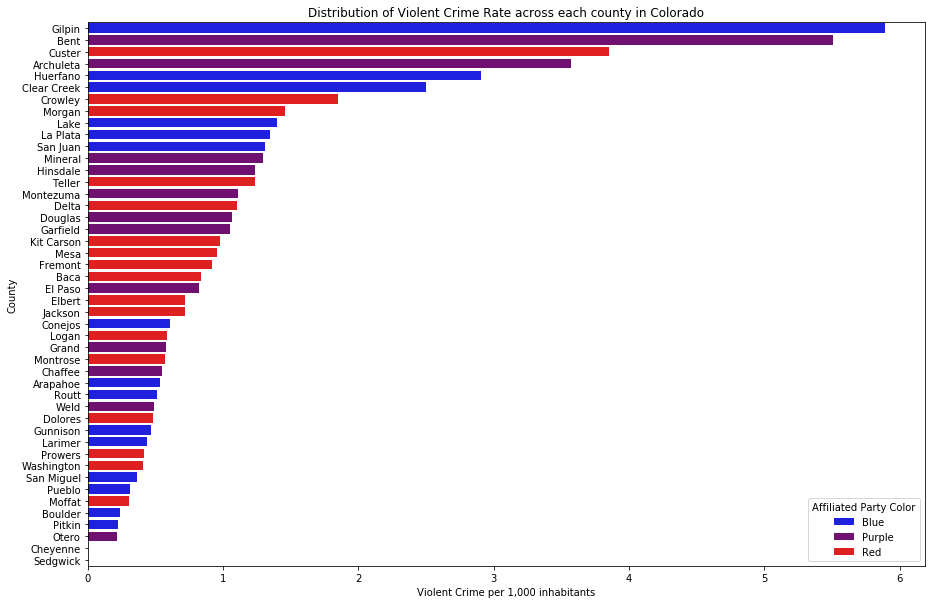

In [3]:
palette = {'Red': 'Red', 'Blue': 'Blue', 'Purple': 'Purple'}
fig,ax = plt.subplots(figsize=(15,10))

co_data.sort_values(by='Violent Crime per 1,000 inhabitants',ascending=False,inplace=True)

sns.barplot(x="Violent Crime per 1,000 inhabitants",y="County",data=co_data, ax=ax, hue="Affiliated Party Color",palette=palette,dodge=False)
plt.title("Distribution of Violent Crime Rate across each county in Colorado")
ax.figure.savefig("../../Figures/Bar-violent_crime_CO.png")

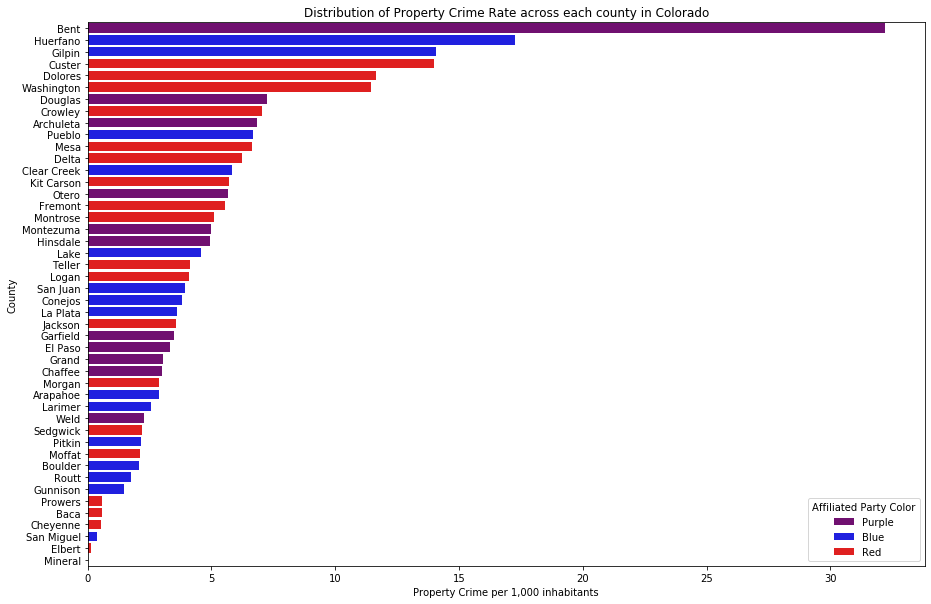

In [4]:
palette = {'Red': 'Red', 'Blue': 'Blue', 'Purple': 'Purple'}
fig,ax = plt.subplots(figsize=(15,10))

co_data.sort_values(by='Property Crime per 1,000 inhabitants',ascending=False,inplace=True)

sns.barplot(x="Property Crime per 1,000 inhabitants",y="County",data=co_data, ax=ax, hue="Affiliated Party Color",palette=palette,dodge=False)
plt.title("Distribution of Property Crime Rate across each county in Colorado")
ax.figure.savefig("../../Figures/Bar-property_crime_CO.png")

# Pie Charts

findfont: Font family ['Constantia'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Constantia'] not found. Falling back to DejaVu Sans.


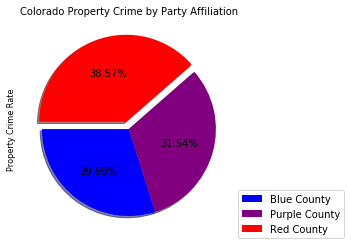

In [5]:
color_list = ["blue", "purple", "red"]

group_party_prop = co_data.groupby("Affiliated Party Color").sum()["Property Crime per 1,000 inhabitants"]

plt.pie(group_party_prop, autopct="%1.2f%%", shadow=True, startangle=180,colors=color_list, explode = (0,0,0.09,))


plt.ylabel("Property Crime Rate", fontsize=8, fontname="Constantia")
plt.title("Colorado Property Crime by Party Affiliation", fontsize= 10, fontname="Constantia")
legend_name = ("Blue County", "Purple County","Red County")
plt.legend(legend_name, loc=(1,0))
plt.savefig("../../Figures/Pie-CO_party_propcrime.png")
plt.show()

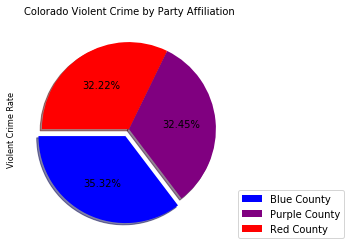

In [13]:
color_list = ["blue", "purple", "red"]

group_party_prop = co_data.groupby("Affiliated Party Color").sum()["Violent Crime per 1,000 inhabitants"]

plt.pie(group_party_prop, autopct="%1.2f%%", shadow=True, startangle=180,colors=color_list, explode = (0.09,0,0))


plt.ylabel("Violent Crime Rate", fontsize=8, fontname="Constantia")
plt.title("Colorado Violent Crime by Party Affiliation", fontsize= 10, fontname="Constantia")
legend_name = ("Blue County", "Purple County","Red County")
plt.legend(legend_name, loc=(1,0))
plt.savefig("../../Figures/Pie-CO_party_viocrime.png")
plt.show()

# Scatter Plot and Regression Analysis

In [7]:
# Assign the variables for red states
red_violent_crime = co_data.loc[co_data["Affiliated Party Color"]=="Red","Violent Crime per 1,000 inhabitants"]
red_property_crime = co_data.loc[co_data["Affiliated Party Color"]=="Red","Property Crime per 1,000 inhabitants"]
red_unemployment=co_data.loc[co_data["Affiliated Party Color"]=="Red","Unemployment Rate"]

# Assign the variables for purple states
purple_violent_crime = co_data.loc[co_data["Affiliated Party Color"]=="Purple","Violent Crime per 1,000 inhabitants"]
purple_property_crime = co_data.loc[co_data["Affiliated Party Color"]=="Purple","Property Crime per 1,000 inhabitants"]
purple_unemployment=co_data.loc[co_data["Affiliated Party Color"]=="Purple","Unemployment Rate"]

# Assign the variables for blue states
blue_violent_crime= co_data.loc[co_data["Affiliated Party Color"]=="Blue","Violent Crime per 1,000 inhabitants"]
blue_property_crime = co_data.loc[co_data["Affiliated Party Color"]=="Blue","Property Crime per 1,000 inhabitants"]
blue_unemployment= co_data.loc[co_data["Affiliated Party Color"]=="Blue","Unemployment Rate"]

In [8]:
def regress_scatter(x,y,a,b,c,d,e,f):

    (slope,intercept,rvalue,pvalue,stderr)=st.linregress(x,y) # Calculate the linear regression
    regress=slope*x+intercept # Calculate the new y values using the linear equation
    lin_equation=f"y={round(slope,3)}*x+{round(intercept,2)}"
    correlation=st.pearsonr(x,y)

    #Display the line plot
    plt.figure(figsize=(10,6))
    plt.plot(x,regress,color="black")
    plt.annotate(lin_equation,xy_coord,fontsize="xx-large",color="black",fontweight="semibold")
    plt.annotate(f"Correlation: {round(correlation[0],3)}\nR-squared: {round(rvalue**2,3)}\nP-value: {round(pvalue,3)}",\
                coord,fontsize="large",color="black")

    #Display the scatter plots with different colors
    plt.scatter(x=a,y=b, c="red", label="Red County")
    plt.scatter(x=c,y=d, c="blue", label="Blue County")
    plt.scatter(x=e,y=f, c="purple", label="Purple County")
    plt.legend()

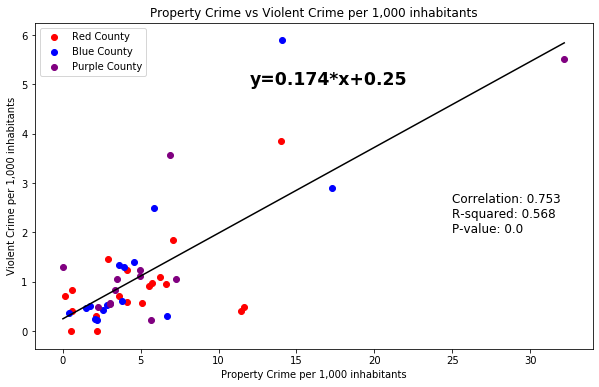

In [9]:
#Assign x and y values for regression
x=co_data["Property Crime per 1,000 inhabitants"]
y=co_data["Violent Crime per 1,000 inhabitants"]

xy_coord=(12,5)
coord=(25,2)

regress_scatter(x,y,red_property_crime,red_violent_crime,blue_property_crime,blue_violent_crime,\
               purple_property_crime,purple_violent_crime)

# Set the title and labels
plt.title("Property Crime vs Violent Crime per 1,000 inhabitants")
plt.xlabel("Property Crime per 1,000 inhabitants")
plt.ylabel("Violent Crime per 1,000 inhabitants")
plt.savefig("../../Figures/Scatter-CO_property_vs_violent.png")
plt.show()

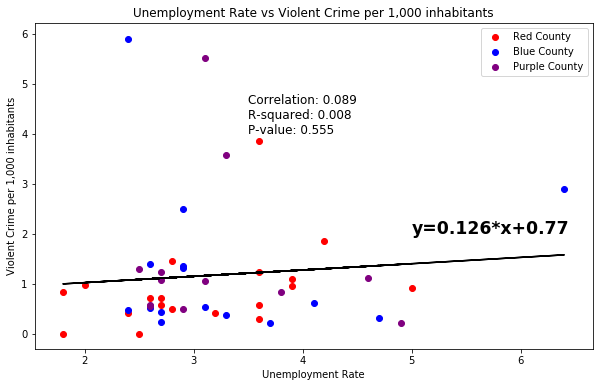

In [10]:
#Assign x and y values for regression
x=co_data["Unemployment Rate"]
y=co_data["Violent Crime per 1,000 inhabitants"]

xy_coord=(5,2)
coord=(3.5,4)

regress_scatter(x,y,red_unemployment,red_violent_crime,blue_unemployment,blue_violent_crime,\
               purple_unemployment,purple_violent_crime)

# Set the title and labels
plt.title("Unemployment Rate vs Violent Crime per 1,000 inhabitants")
plt.xlabel("Unemployment Rate")
plt.ylabel("Violent Crime per 1,000 inhabitants")
plt.savefig("../../Figures/Scatter-CO_unemployment_vs_violent.png")
plt.show()

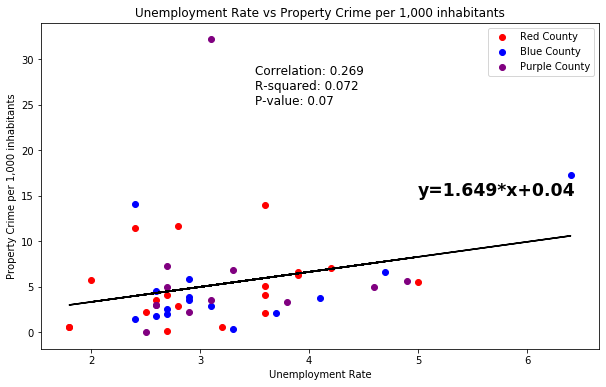

In [11]:
#Assign x and y values for regression
x=co_data["Unemployment Rate"]
y=co_data["Property Crime per 1,000 inhabitants"]

xy_coord=(5,15)
coord=(3.5,25)

regress_scatter(x,y,red_unemployment,red_property_crime,blue_unemployment,blue_property_crime,\
               purple_unemployment,purple_property_crime)

# Set the title and labels
plt.title("Unemployment Rate vs Property Crime per 1,000 inhabitants")
plt.xlabel("Unemployment Rate")
plt.ylabel("Property Crime per 1,000 inhabitants")
plt.savefig("../../Figures/Scatter-CO_unemployment_vs_property.png")
plt.show()